# Online PyEmittance

The following will work either on a production system, or with a simulated EPICS server.

For local development, start a simulated EPICS server using the `simulated_epics.ipynb` notebook, or run in a separate process:

```python
from pyemittance.simulation_server import start_server
start_server()
```

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pyemittance import PyEmittance, print_logging
import numpy as np
print_logging() # Print log messages here

In [3]:
meas = PyEmittance(config_name='LCLS2_OTR0H04')
meas.online = True

# Set some other options
meas.add_pnts = False
meas.num_points = 7   # only matters if adapt_ranges is used.
meas.adapt_ranges = True  # If helping, will ensure there are at least 7 total points
meas.check_sym = True
meas.infl_check = True

meas.show_plots = True

# Change quad bounds
meas.config_dict['meas_pv_info']['meas_device']['bounds'] = [-6, 8]

# Change settle time
meas.config_dict['meas_pv_info']['meas_device']['settle_time'] = 0.1

meas.config_dict


2023-09-02 16:00:09,852 | INFO : Initializing observer


{'beamline_info': {'name': 'LCLS2',
  'species': 'electron',
  'Lquad': 0.1244,
  'energy': 80000000.0,
  'Twiss0': [1e-06, 1e-06, 5.01, 5.01, 0.049, 0.049],
  'rMatx': [1, 2.2, 0, 1],
  'rMaty': [1, 2.2, 0, 1]},
 'img_proc': {'subtract_bg': False,
  'use_roi': False,
  'avg_ims': True,
  'n_to_acquire': 1,
  'background_im': '/home/physics3/ml_tuning/20220805_LCLS2_inj/example_images/bg_8_6_22.npy',
  'amp_threshold': 150,
  'min_sigma': 3,
  'max_sigma': 700,
  'max_samples': 1,
  'roi': {'xmin': 0, 'xmax': 100, 'ymin': 0, 'ymax': 100}},
 'meas_pv_info': {'diagnostic': {'pv': {'name': 'OTRS:HTR:330',
    'image': 'OTRS:HTR:330:Image:ArrayData',
    'nrow': 'OTRS:HTR:330:Image:ArraySize1_RBV',
    'ncol': 'OTRS:HTR:330:Image:ArraySize0_RBV',
    'resolution': 'OTRS:HTR:330:RESOLUTION',
    'xsize': 'OTRS:HTR:330:XRMS',
    'ysize': 'OTRS:HTR:330:YRMS'}},
  'meas_device': {'settle_time': 0.1,
   'bounds': [-6, 8],
   'pv': {'name': 'QUAD:HTR:120',
    'cntrl': 'QUAD:HTR:120:BCTRL',
   

In [4]:
meas.observer.get_beamsizes(1.2345)

{'xrms': 0.0002856050839798949,
 'yrms': 0.0002720644153953202,
 'xrms_err': 0,
 'yrms_err': 0}

In [5]:
# Convenience methods.
meas.quad_init, meas.quad_bounds

([-6, -4, -2, 0], [-6, 8])

In [6]:
meas.config_dict.keys()

dict_keys(['beamline_info', 'img_proc', 'meas_pv_info', 'savepaths'])

In [7]:
meas.config_dict['meas_pv_info']['meas_device']

{'settle_time': 0.1,
 'bounds': [-6, 8],
 'pv': {'name': 'QUAD:HTR:120',
  'cntrl': 'QUAD:HTR:120:BCTRL',
  'read': 'QUAD:HTR:120:BACT'}}

In [8]:
meas.config_dict['img_proc']

{'subtract_bg': False,
 'use_roi': False,
 'avg_ims': True,
 'n_to_acquire': 1,
 'background_im': '/home/physics3/ml_tuning/20220805_LCLS2_inj/example_images/bg_8_6_22.npy',
 'amp_threshold': 150,
 'min_sigma': 3,
 'max_sigma': 700,
 'max_samples': 1,
 'roi': {'xmin': 0, 'xmax': 100, 'ymin': 0, 'ymax': 100}}

2023-09-02 16:00:10,019 | INFO : Initializing observer
2023-09-02 16:00:10,021 | INFO : Running online!
2023-09-02 16:00:10,022 | INFO : EPICS put QUAD:HTR:120:BCTRL = -6
2023-09-02 16:00:10,023 | INFO : Settling for 0.1 s...
2023-09-02 16:00:11,046 | INFO : 2023-09-02_16-00-11-046232
2023-09-02 16:00:11,276 | INFO : EPICS put QUAD:HTR:120:BCTRL = -4
2023-09-02 16:00:11,278 | INFO : Settling for 0.1 s...
2023-09-02 16:00:11,773 | INFO : 2023-09-02_16-00-11-773604
[<pyemittance.image.Image object at 0x7f1087433790>, <pyemittance.image.Image object at 0x7f108634daf0>]
2023-09-02 16:00:11,941 | INFO : EPICS put QUAD:HTR:120:BCTRL = -2
2023-09-02 16:00:11,943 | INFO : Settling for 0.1 s...
2023-09-02 16:00:12,441 | INFO : 2023-09-02_16-00-12-441863
[<pyemittance.image.Image object at 0x7f1087433790>, <pyemittance.image.Image object at 0x7f108634daf0>, <pyemittance.image.Image object at 0x7f10bc491af0>]
2023-09-02 16:00:12,596 | INFO : EPICS put QUAD:HTR:120:BCTRL = 0
2023-09-02 16:00:12,59

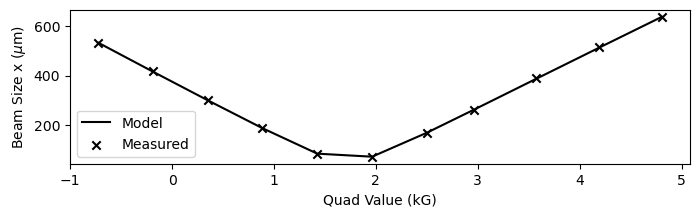

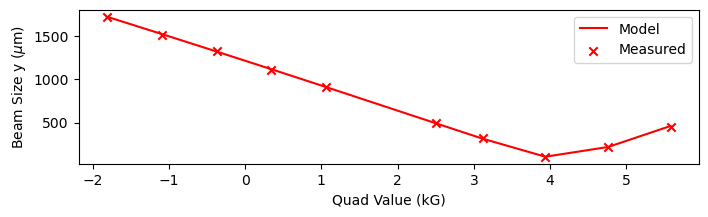

In [9]:
result = meas.measure_emittance()

# Examine results

In [10]:
import matplotlib.pyplot as plt

In [11]:
result

{'quadvalsx': array([-0.72592146, -0.18826788,  0.34938569,  0.88703927,  1.42469285,
         1.96234642,  2.5       ,  2.96084592,  3.57530715,  4.18976838,
         4.80422961]),
 'beamsizesx': array([5.31078936e-04, 4.16967250e-04, 3.00199679e-04, 1.87642596e-04,
        8.65015138e-05, 7.40842698e-05, 1.71003369e-04, 2.62990146e-04,
        3.89370174e-04, 5.15351284e-04, 6.37011245e-04]),
 'beamsizeserrx': array([6.23146215e-07, 3.90894651e-07, 2.63595986e-07, 1.18694232e-07,
        2.89670715e-08, 3.39773933e-08, 9.45749799e-08, 1.97634824e-07,
        3.77245628e-07, 5.77603650e-07, 8.91494299e-07]),
 'error_x': False,
 'emit_x': 6.380225302143409e-09,
 'norm_emit_x': 9.988427795017674e-07,
 'beta_x': 10.028119862136135,
 'alpha_x': -2.0149667431522307,
 'emit_x_err': 3.584955433519756e-12,
 'norm_emit_x_err': 5.612351727459969e-10,
 'beta_x_rel_err': 0.000561885398046273,
 'alpha_x_rel_err': -3.2106833809592616e-20,
 'sigma_11': 6.398166407732784e-08,
 'sigma_12': 1.285594179

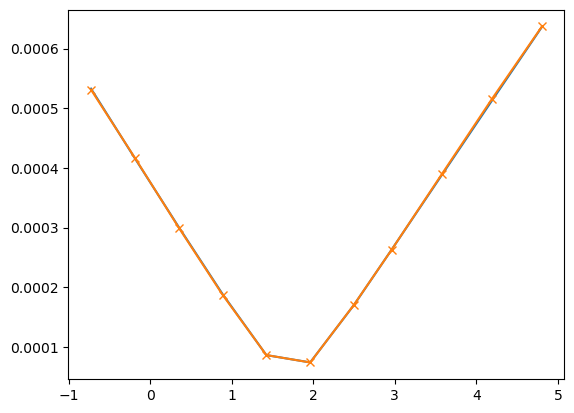

In [12]:
plt.plot(result['quadvalsx'], np.sqrt(result['screen_sigma_11']))
plt.plot(result['quadvalsx'], result['beamsizesx'], marker='x')

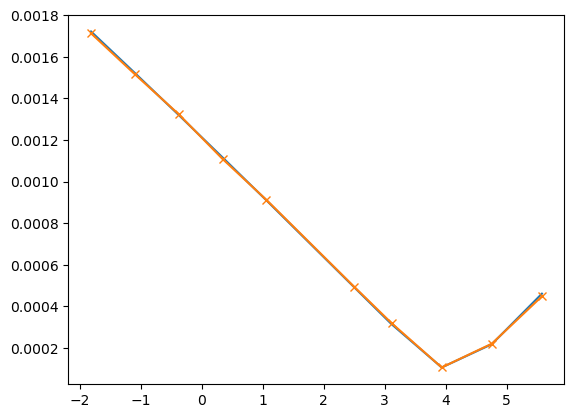

In [13]:
plt.plot(result['quadvalsy'], np.sqrt(result['screen_sigma_33']))
plt.plot(result['quadvalsy'], result['beamsizesy'], marker='x')

# Observer

The observer keeps all measurements made, as well as extra information such as images.

In [14]:
o = meas.observer
o.beam_meas['x']

[0.0017319965094041647,
 0.0012677116067485394,
 0.0008156152128438839,
 0.0007717229143932074,
 0.0006109280395657084,
 0.0005310789363652958,
 0.0004565024520392191,
 0.00041696725034169694,
 0.00037389685405919346,
 0.0003001996785587896,
 0.00018764259633947025,
 0.0001527761765133468,
 8.650151376800355e-05,
 nan,
 7.408426981944035e-05,
 0.0001710033694494241,
 0.0002629901458582531,
 0.00029583871423323097,
 0.0003893701741397189,
 0.0004609075071683442,
 0.0005153512835542348,
 0.0006370112451163578,
 0.0007952563299734706]

In [15]:
# Note that this was a problematic image
ix_nan = np.where(np.isnan(o.beam_meas['x']))[0][0]
ix_nan

13

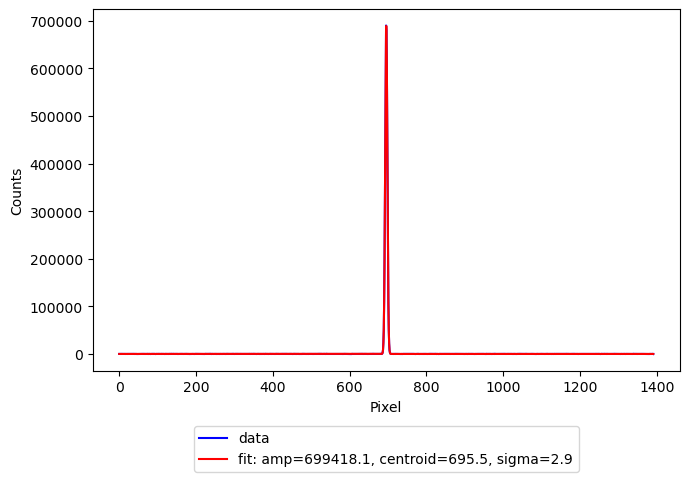

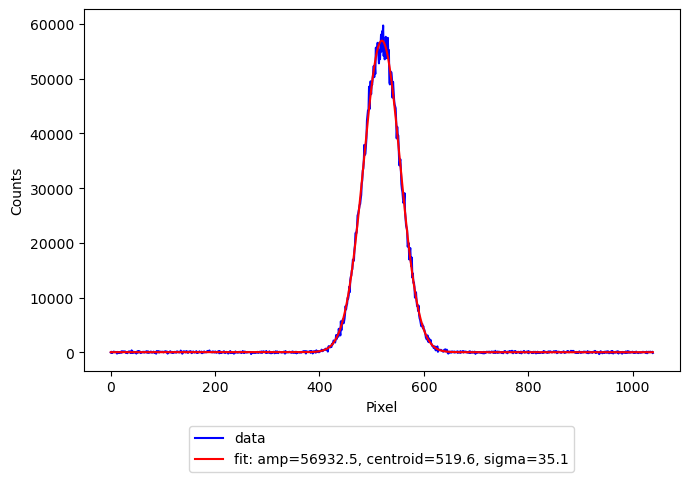

{'xrms': 2.8522865575268885,
 'yrms': 35.06890802299145,
 'xrms_err': 0.0010253071845839176,
 'yrms_err': 0.05845542290783643,
 'xamp': 699418.1145178082,
 'yamp': 56932.52655505132}

In [16]:
# This is the image
o.extra[ix_nan].get_sizes()

In [17]:
# The observer can also set the quad and return sizes (and extra image).
dat = o.get_beamsizes(1.2345)
dat

2023-09-02 16:00:27,428 | INFO : EPICS put QUAD:HTR:120:BCTRL = 1.2345
2023-09-02 16:00:27,430 | INFO : Settling for 0.1 s...
2023-09-02 16:00:27,895 | INFO : 2023-09-02_16-00-27-895549


{'xrms': 0.00012047477546215778,
 'yrms': 0.0008570228573263447,
 'xrms_err': 5.86217973346717e-08,
 'yrms_err': 1.528657218869215e-06,
 'extra': <pyemittance.image.Image at 0x7f105b696400>}

In [18]:
# This is the image
im = dat['extra']
im

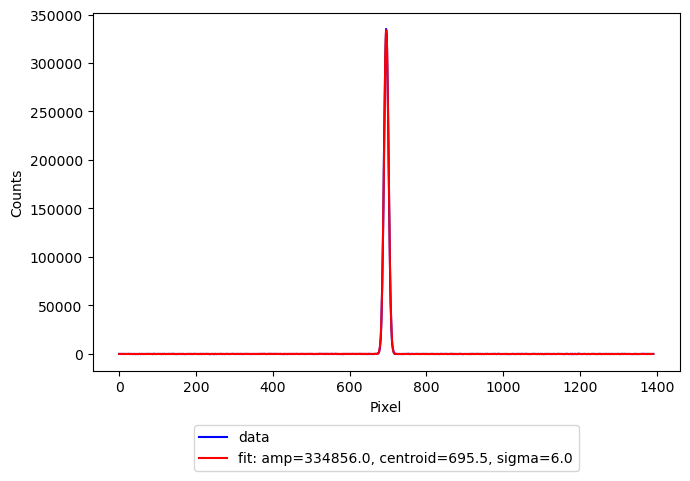

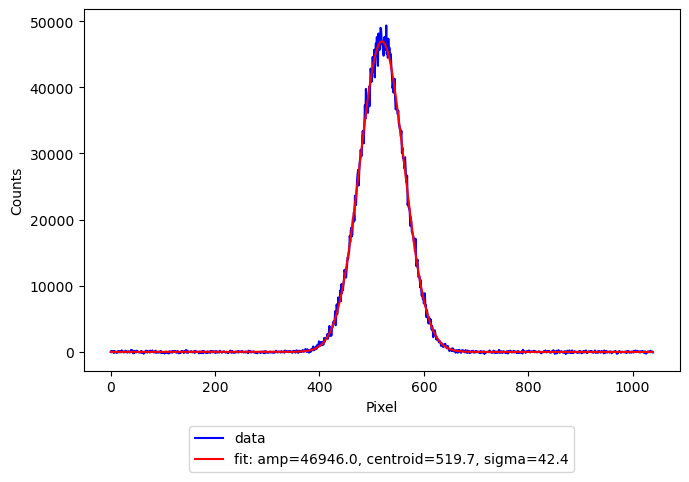

{'xrms': 5.964097795156326,
 'yrms': 42.42687412506657,
 'xrms_err': 0.0029020691749837477,
 'yrms_err': 0.07567609994402054,
 'xamp': 334856.0390775527,
 'yamp': 46946.04587345442}

In [19]:
# This plots. TODO: make a .plot() instead
im.get_sizes()

# Interactively change the quad and acquire the screen image

0.00037486171231124573


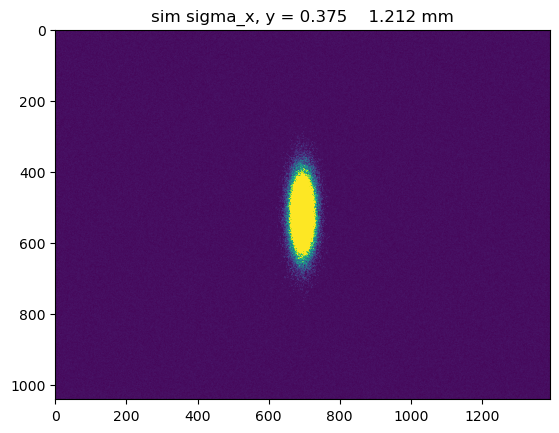

In [20]:
import epics
import matplotlib.pyplot as plt

from ipywidgets import interact

def f(quad_value):
    epics.caput('QUAD:HTR:120:BCTRL', quad_value)
    a = epics.caget('OTRS:HTR:330:Image:ArrayData').reshape(1040, 1392)
    sigma_x = epics.caget('sim_screen_sigma_x')
    sigma_y = epics.caget('sim_screen_sigma_y')  
    print(sigma_x)
    plt.imshow(a, vmax=128)
    plt.title(f'sim sigma_x, y = {sigma_x*1e3:0.3f}    {sigma_y*1e3:0.3f} mm')
    
# interact(f, quad_value=(-4, 4, .1))    
f(0)